## **Identifying the type of data**

When identifying the type of data there are mutliple ways of doing it:

Checking the variable types:
1.  Numerical - Datasets containing numbers that mathematical operations can be performed on are classified as numerical data
2. Categorical - Datasets contianing data that is grouped into categories in no seemingly meaningful order are classified as categorical data
3. Ordinal or Nominal -






How can we use this to decide whether to do a regression or classification on a dataset:

We can use classifiacation when our targer variable is categorical (or represents classes or labels)


Identifying if the data is Linear or non-linear:




In [ ]:
# Install any packages that we need

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read our data

data1 = pd.read_csv('/content/Housing_real.csv')
data2 = pd.read_csv('/content/wine_data 2.csv')
data3 = pd.read_csv('/content/data.csv')
data4 = pd.read_csv('/content/phone_data.csv')

## **DATASET 1: Housing Data**



---



In [ ]:
data1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
print(data1.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


**What type of data is dataset 1?** There is evidence that this dataset is categorical. The majority of variables such as guestroom and basement are in categories of yes and no, however there are some variables that are numerical such as price and area. We can therefore conclude that the dataset contains both numerical and categorical data.

**Linear or non-linear?** To see whether the data is non-linear or linear I have decided to produce a correlation matrix. A correlation matrix can tell you the linearity of a dataset as it provides you with information about the relationships between your varibales in your dataset. The correlation coefficients printed in a correlation matrix indicate both the stregth and direction of the relationship between two given variables.

We can also visualise this in a heat map to show the correlations between each of the varibales in our dataset. A heat map visualises the results of a correlation matrix by using colour to indicate the realtionship between variables.

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


<ipython-input-25-9161ce6a819c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data1.corr()


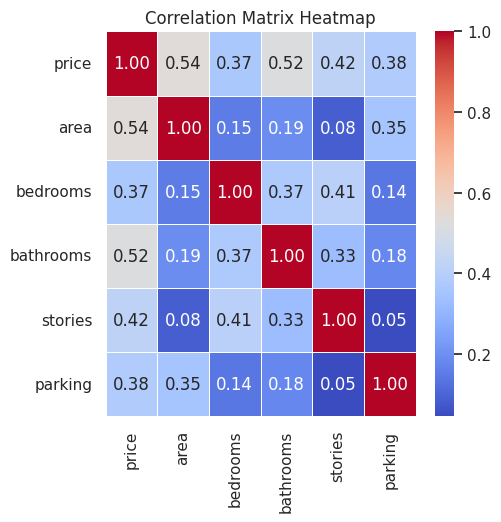

In [ ]:
correlation_matrix = data1.corr()
print(correlation_matrix)

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

From our results we can infer that the housing dataset has some variables that have moderately linear relationships betweeen for example, between price and area the correlation coeffcient is 0.535997 indicating a moderately positive relationship.

However, it is importnat to note that correlation matricies do not show any non-linear relationships and therefore we may also need to use scatter plots to visualise the relationships between some of our variables.

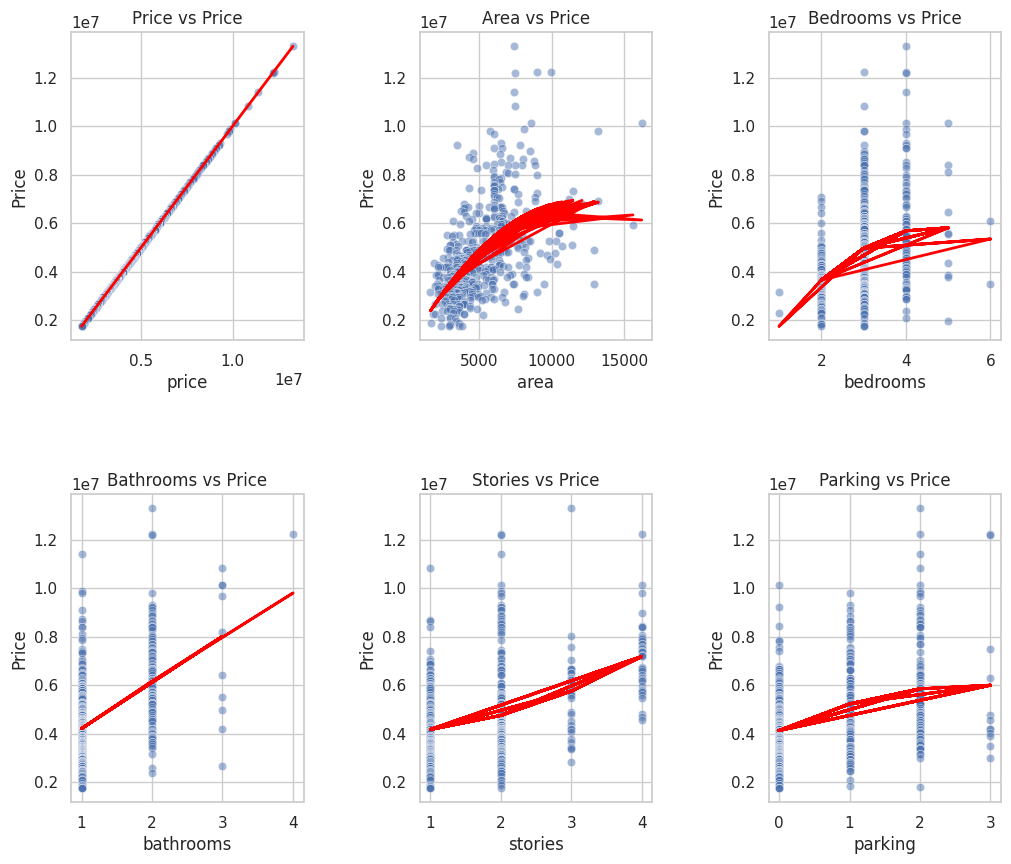

In [ ]:
# Features to plot
features_to_plot = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Create a grid of scatter plots with polynomial regression lines
plt.figure(figsize=(12, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing between subplots

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)

    # Scatter plot
    sns.scatterplot(data=data1, x=feature, y='price', alpha=0.5)

    # Polynomial regression
    z = np.polyfit(data1[feature], data1['price'], 2)  # Change the degree if needed
    p = np.poly1d(z)
    plt.plot(data1[feature], p(data1[feature]), color='red', linewidth=2)

    plt.title(f'{feature.capitalize()} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.show()

From visualising our data in scatter plots we can see that the trend lines are very close to being straight in the scatter plots and therefore we can conclude that the data is linear data.

**Single or Multilabel?** The data in data1 is single label data as each observation is associated with target variable of house price. If the data was predicting both price and another target varible such as "time taken to be sold" then the data would be multi label.

### **Explanatory analysis technique for dataset 1:**

For this data set I decided to create a count bar chart for the categorical variables to easily visualise how many observations fell into each category.

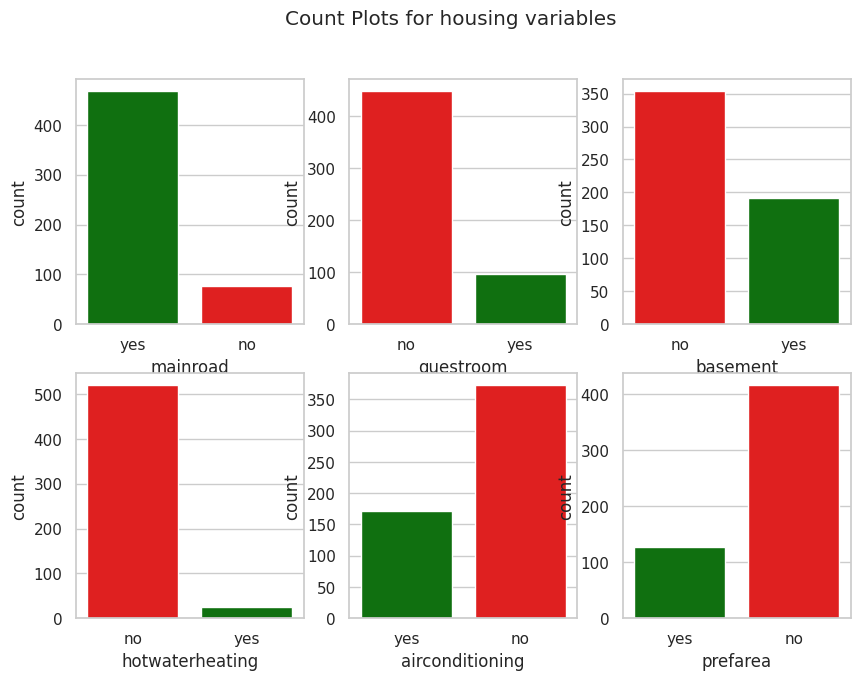

In [ ]:
# Set up the visuals of the plot inlcuding a colour palette of red for no and green for yes
sns.set(style="whitegrid")
custom_palette = {'yes': 'green', 'no': 'red'}
plt.figure(figsize=(10, 7))
plt.suptitle('Count Plots for housing variables')
plt.tight_layout()

# Chart 1
plt.subplot(2, 3, 1)
sns.countplot(x='mainroad', data=data1, palette=custom_palette)

# Chart 2
plt.subplot(2, 3, 2)
sns.countplot(x='guestroom', data=data1, palette=custom_palette)

# Chart 3
plt.subplot(2, 3, 3)
sns.countplot(x='basement', data=data1, palette=custom_palette)

# Chart 4
plt.subplot(2, 3, 4)
sns.countplot(x='hotwaterheating', data=data1, palette=custom_palette)

# Chart 5
plt.subplot(2, 3, 5)
sns.countplot(x='airconditioning', data=data1, palette=custom_palette)

# Chart 6
plt.subplot(2, 3, 6)
sns.countplot(x='prefarea', data=data1, palette=custom_palette)

plt.show()

### **Inferential analysis technique for dataset 1:**

For this dataset I decided to carry out a ordinary least squares (OLS) method for a mutliple regression model as there is many independent variables in our dataset.

Before I run this I must check for multicollineararity and normality of the residuals.

VIF Values:
    Variable        VIF
0       area   6.737363
1   bedrooms  13.652525
2  bathrooms   9.155151
3    stories   6.683602
4    parking   1.901606


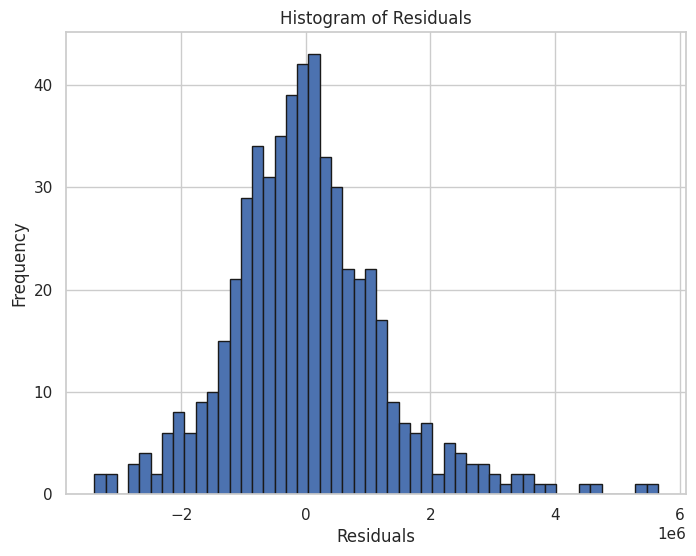


Shapiro-Wilk Test for Normality:
Test Statistic: 0.9653437733650208, p-value: 4.852442891944975e-10


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

X = data1[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data1['price']

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print("VIF Values:")
print(vif_data)

# Calculate residuals
model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model.resid

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = shapiro(residuals)
print("\nShapiro-Wilk Test for Normality:")
print(f"Test Statistic: {stat}, p-value: {p_value}")

The variance inflation factors (VIF) values that we have got highlight the degree of multicoloinearity between the independent variables in our data.

Usually when evaluating VIF values a score of above 10 is seemed to be deemed problematic. From the results obtained you can see that the bedrooms VIF score of 13.653 is above 10 and therefore problematic suggesting a strong correlation between bedrooms and other variables.

Due to the problematic VIF score we should consider alternative inferential analysis techniques than the OLS multiple regression.

One way in which we can mitigate multicolinearity is by carrying out principal component analysis.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numerical_columns = data1.select_dtypes(include=['int64']).columns

# Extract numerical features
X = data1[numerical_columns]

# Standardize the features in the data
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# define and calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

print("Explained Variance Ratios:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance Ratios:")
print(cumulative_variance_ratio)

Explained Variance Ratios:
[0.42601752 0.20285811 0.11285691 0.10944497 0.09847324 0.05034924]

Cumulative Explained Variance Ratios:
[0.42601752 0.62887563 0.74173254 0.85117751 0.94965076 1.        ]


The explained variance ratio from our results [0.42601752 0.20285811 0.11285691 0.10944497 0.09847324 0.05034924] show the proportion of the variances that are explained by each ot the principal components in our data.

The cumlative variance ratio [0.42601752 0.62887563 0.74173254 0.85117751 0.94965076 1.        ] shows the cumlative explainned variance of each of the principal components.

These show that for the first variable area expalins 43% of the variance in house prices (and therefore the majority).

### **Predictive analysis technique for variable 1:**

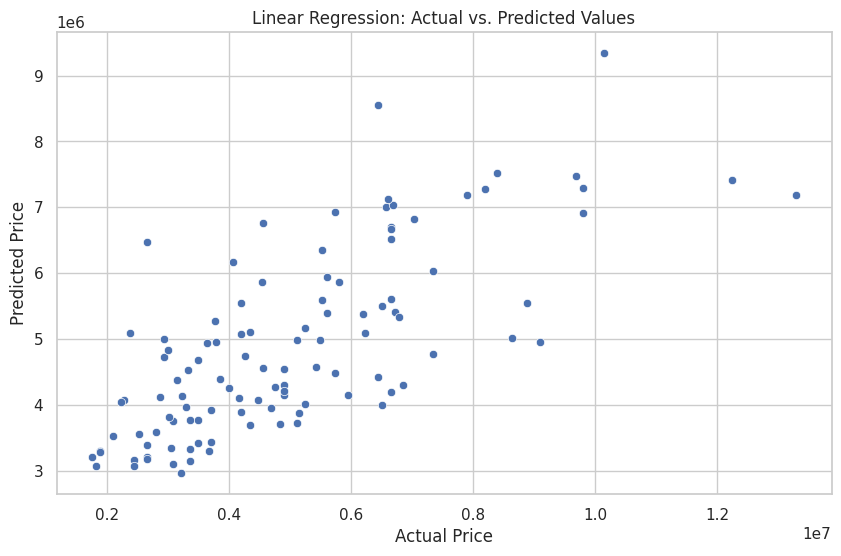

Mean Squared Error: 2457741642022.087


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract relevant features and target variable
X = data1[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data1['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


For the first data set on house prices I decided for my predicitve analysis to traina linear regression model of price based on the independent variables area, bedrooms, bathrooms and stories as these are the numerical variables in my data. I decided to visualise the linear regression in a scatter plot which compares the actual and predicted values.

I also decided to print the mean squared error which is 2457741642022.087 this is reasonable high for the data showinf how this may not be the best model for price.

## **DATASET 2: Wine**

In [ ]:
data2

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
print(data2.dtypes)

Unnamed: 0                        int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


**What type of data is dataset 2?** There is evidence that this dataset is numerical as all of the variables are floats.

**Single or multilabel?** The wine dataset 2 is multilabel as there does not appear to be a target label

**Linear or non-linear?**

                              Unnamed: 0   alcohol  malic_acid       ash  \
Unnamed: 0                      1.000000 -0.362844    0.487630 -0.016086   
alcohol                        -0.362844  1.000000    0.094397  0.211545   
malic_acid                      0.487630  0.094397    1.000000  0.164045   
ash                            -0.016086  0.211545    0.164045  1.000000   
alcalinity_of_ash               0.563955 -0.310235    0.288500  0.443367   
magnesium                      -0.232275  0.270798   -0.054575  0.286587   
total_phenols                  -0.650084  0.289101   -0.335167  0.128980   
flavanoids                     -0.758609  0.236815   -0.411007  0.115077   
nonflavanoid_phenols            0.482817 -0.155929    0.292977  0.186230   
proanthocyanins                -0.406681  0.136698   -0.220746  0.009652   
color_intensity                 0.255444  0.546364    0.248985  0.258887   
hue                            -0.662205 -0.071747   -0.561296 -0.074667   
od280/od315_

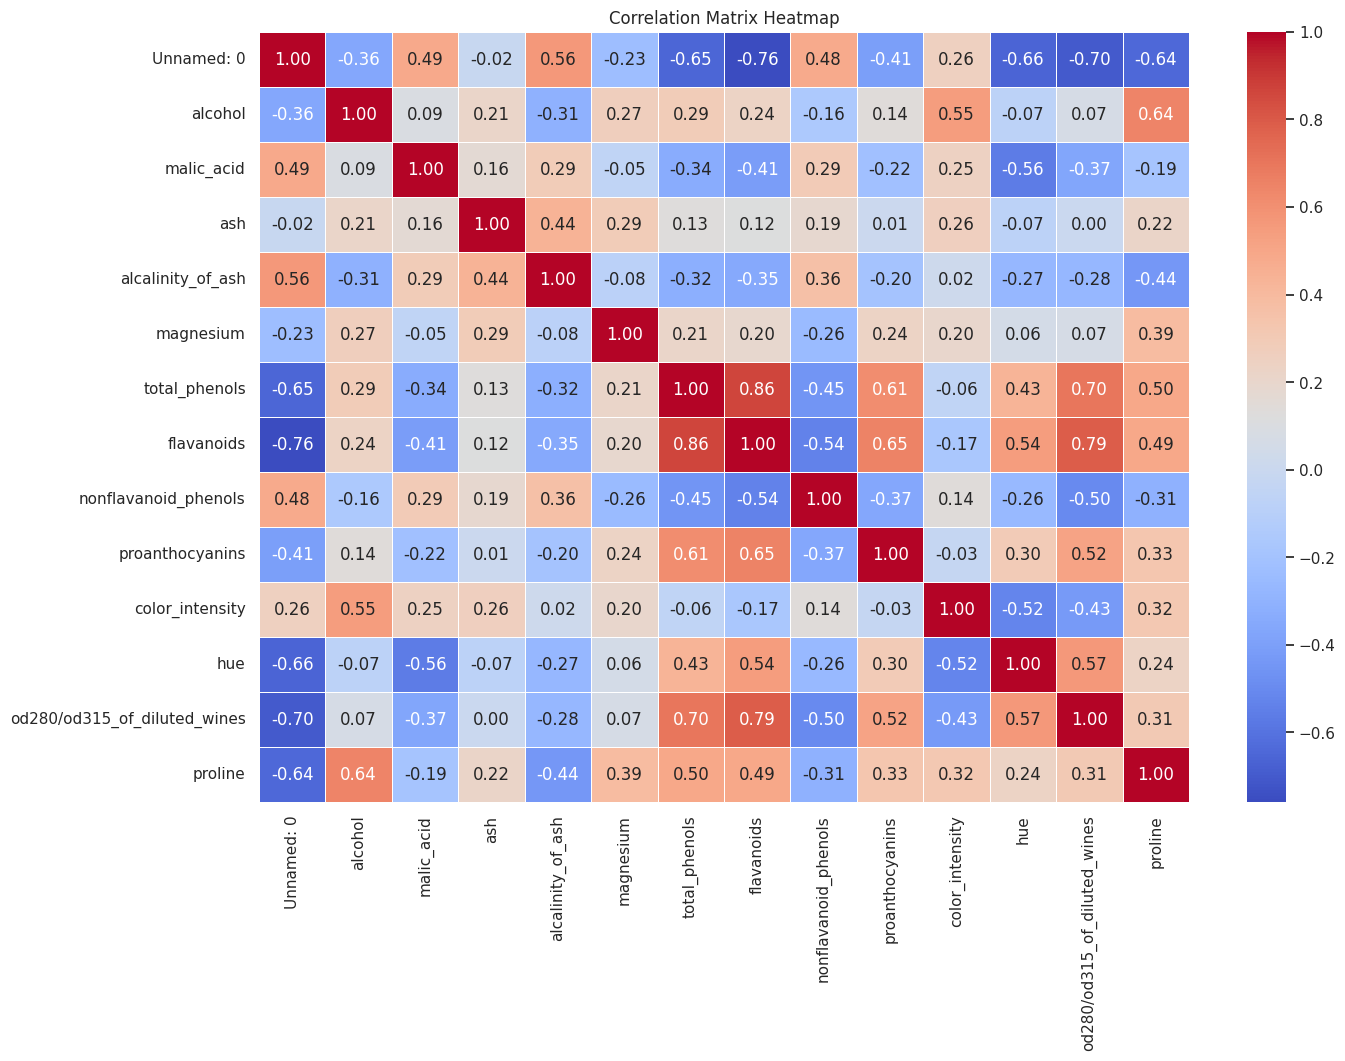

In [ ]:
correlation_matrix = data2.corr()
print(correlation_matrix)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


This shows some linear relationships between variables such as od280/0d315-of_diluted_wines and total-phenols and flavanoids and therefore we can suggest that the data is linear

### **Explanatory Analysis technique for Dataset 2:**

For this data set I wanted to explore the dataset by seeing the descriptive statisitics. I choose this tehcnique because for numerical data it is useful to look at summary statisitcs to get an idea of the data you are looking at in a more concise format. The below results show that for each variable the standard deviation is quite different and highest in magnesium (14.28).

In [ ]:
# Display basic statistics for numerical columns
descriptive_stats_numerical = data2.describe()
data_info = data2.info()
print("Descriptive Statistics for Numerical Columns:")
print(descriptive_stats_numerical)
print("\nData Information:")
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    float64
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

### **Predictive and Inferential Analysis technique for dataset 2:**

For the second dataset I decided to perform a K mean clustering in order to see the groups of wines with similar characteristics in my data. I first visualised a Elbow plot to show me the optimal number of clusters in my data then I performed my K-means clusterings and visualised them using pricnipal component analysis with the three different colours representing the three clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

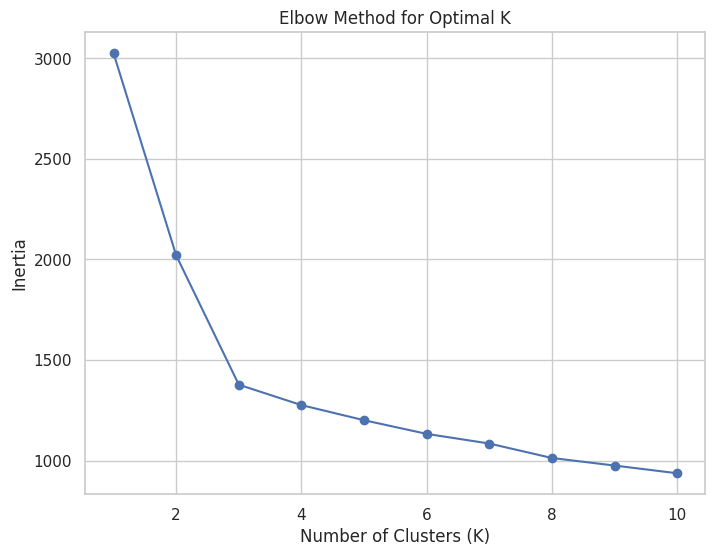

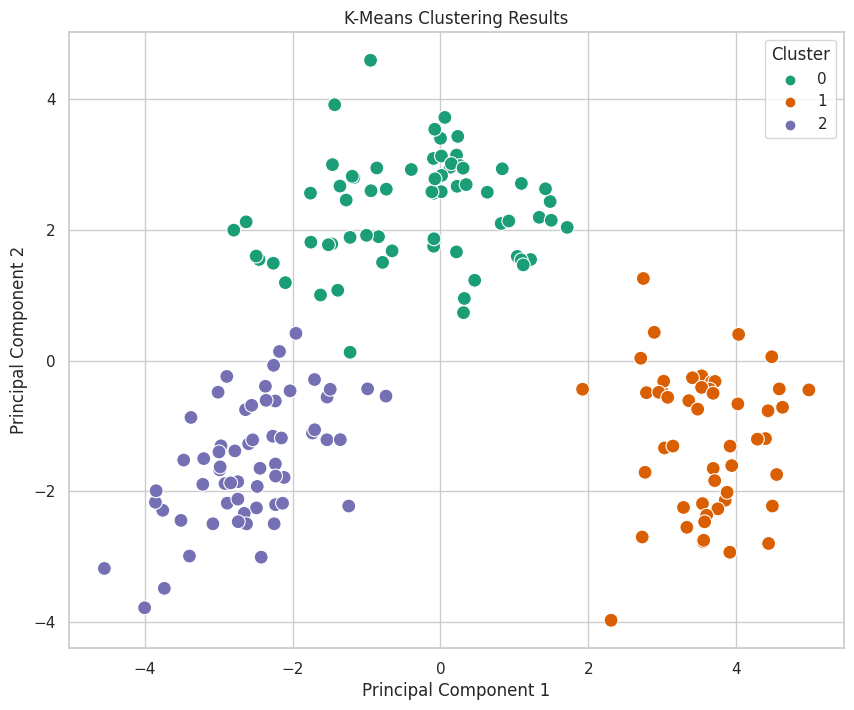

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
wine_data_standardized = scaler.fit_transform(data2)

# Elbow method:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(wine_data_standardized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Now we know the optimal we can change this to 3
optimal_k = 3

# Perform K-Means clustering with the optimal 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
data2['cluster'] = kmeans.fit_predict(wine_data_standardized)

# Visualize the clusters
pca_result = pca.fit_transform(wine_data_standardized)
data2['pca1'] = pca_result[:, 0]
data2['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data2, palette='Dark2', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## **DATASET 3:**

In [ ]:
data3

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [ ]:
print(data3.dtypes)

filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object


**What type of data is dataset 3?** There is evidence that this dataset is numerical. The majority of variables are in continuous numerical form.

**Single or multilabel?** The data seems to only be single label as all of the columns are prediciting the single outcome varibale of genre.

**Linear or non linear?**


                       tempo     beats  chroma_stft      rmse  \
tempo               1.000000  0.966179     0.030640 -0.043503   
beats               0.966179  1.000000     0.080684  0.004607   
chroma_stft         0.030640  0.080684     1.000000  0.499577   
rmse               -0.043503  0.004607     0.499577  1.000000   
spectral_centroid  -0.014415  0.035843     0.615524  0.509984   
spectral_bandwidth -0.039283  0.011287     0.517482  0.529768   
rolloff            -0.020564  0.033489     0.597910  0.537718   
zero_crossing_rate  0.019935  0.056517     0.554735  0.332119   
mfcc1               0.011271  0.082156     0.659294  0.807260   
mfcc2               0.007200 -0.041055    -0.598495 -0.483765   
mfcc3              -0.097491 -0.099869    -0.054431  0.139339   
mfcc4               0.029352  0.063518     0.264226  0.008695   
mfcc5              -0.082223 -0.095422    -0.010116  0.108700   
mfcc6               0.043894  0.088048     0.416953  0.125782   
mfcc7              -0.083

<ipython-input-38-c8c5457f68ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data3.corr()


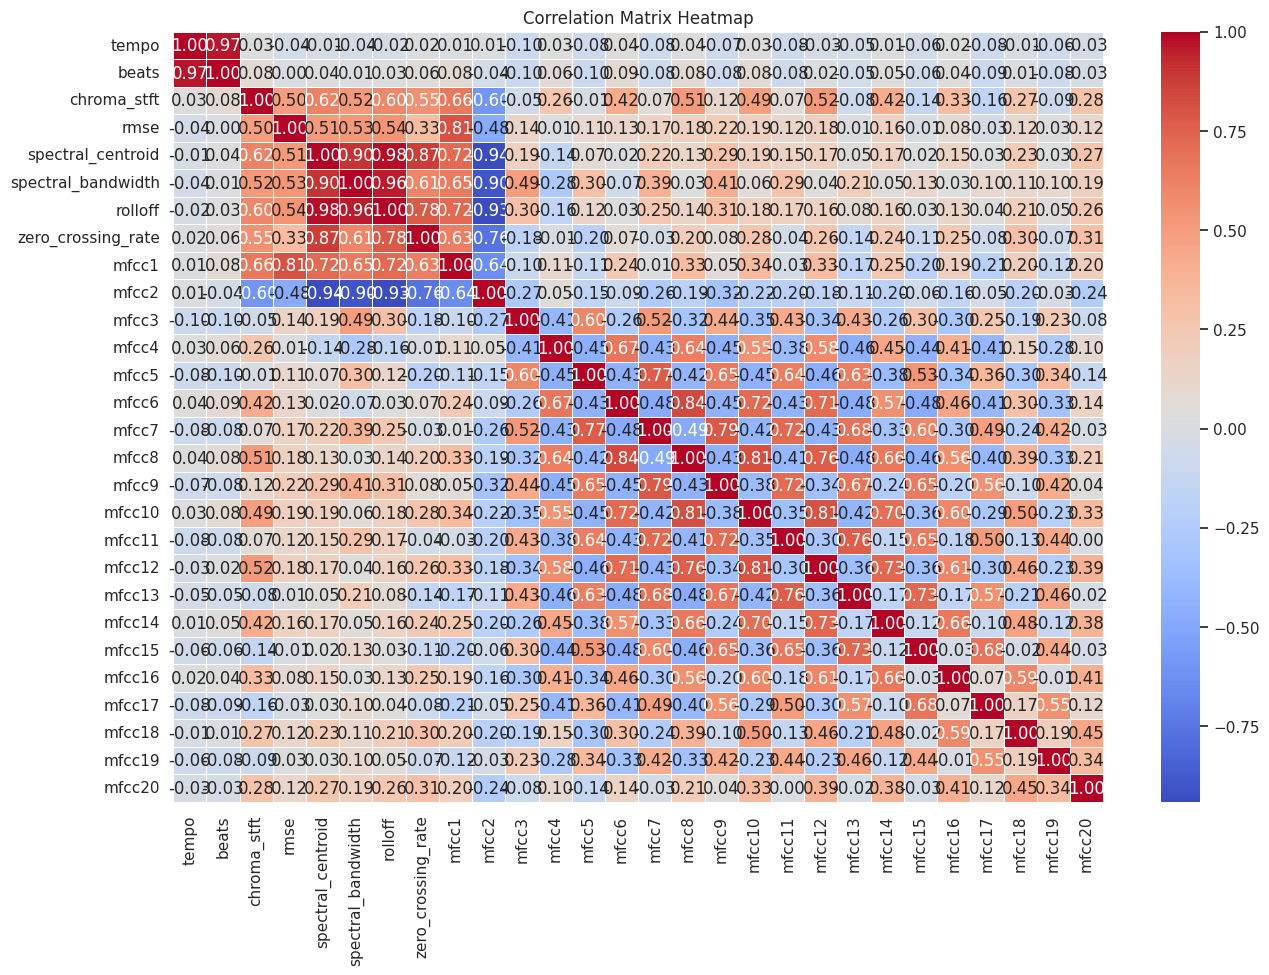

In [ ]:
correlation_matrix = data3.corr()
print(correlation_matrix)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


From this ocrrelation matrix we can see that some varibles are very highly correlated (0.9) and therefore we can conclude that the data is linear.

### **Exploratory analysis technique:**

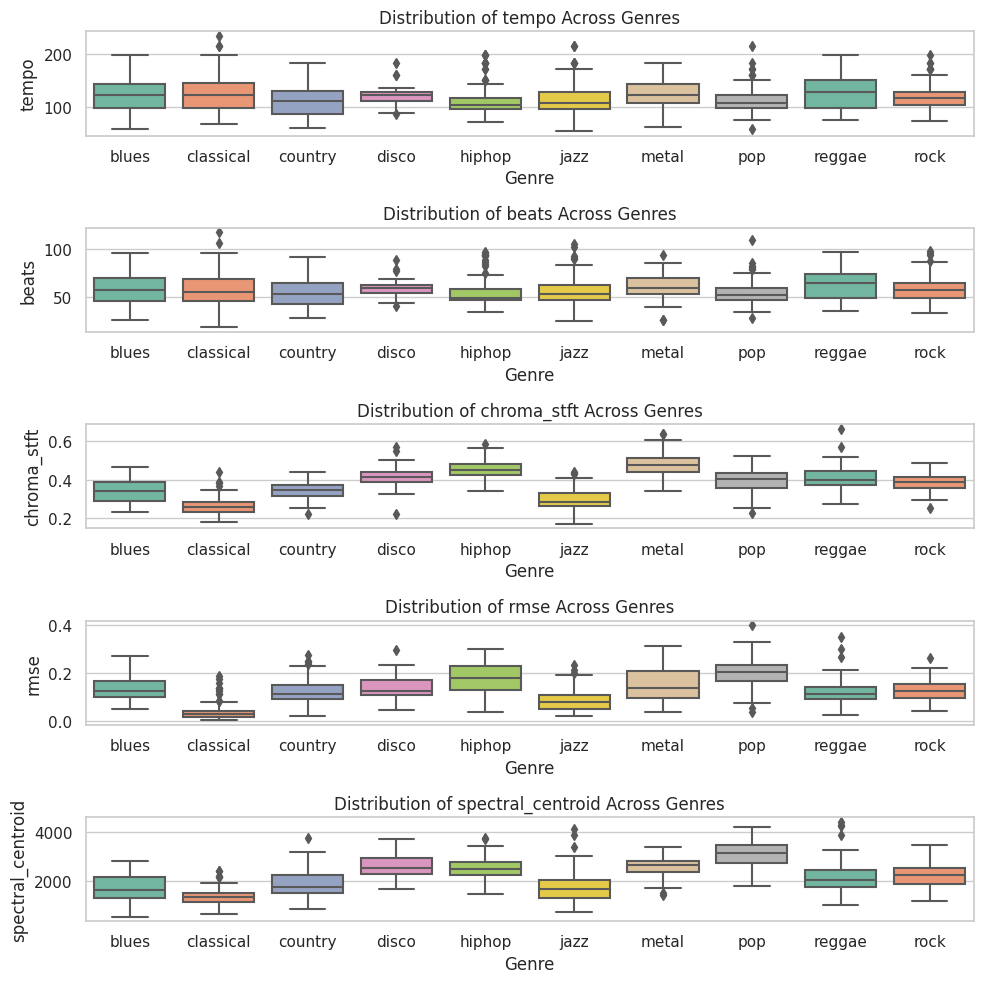

In [ ]:
# List of numerical features to analyze
numerical_features = ['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid']

# Set the style for better visualization
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 2 * len(numerical_features)))

# Iterate through numerical features
for i, feature in enumerate(numerical_features):
    # Create a boxplot for each genre
    sns.boxplot(x='label', y=feature, data=data3, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {feature} Across Genres')
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

### **Inferential analysis tehcnique:**

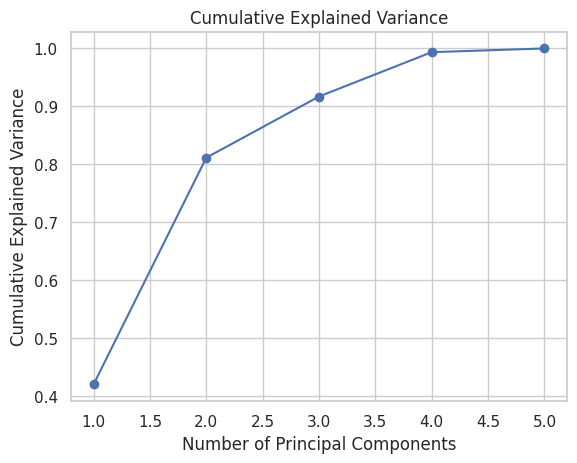

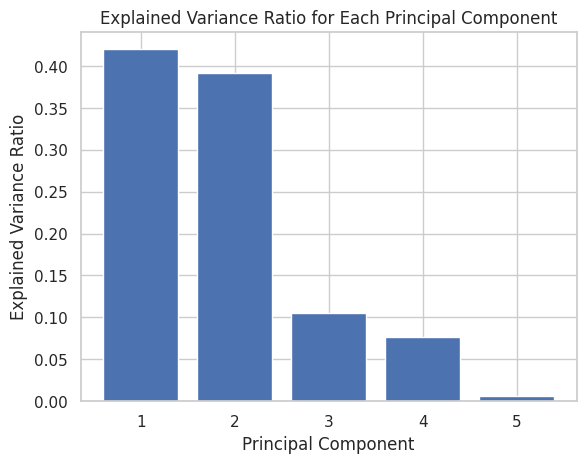

In [ ]:
# Assuming 'df' is your DataFrame with the music data
# Consider only numerical features for PCA
numerical_features = ['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid']

# Extract numerical features
X = data3[numerical_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Plot explained variance ratio for each component
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
# Choose the number of components to retain
n_components = 2  # Adjust this based on the cumulative explained variance plot

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
columns_pca = [f'PC{i}' for i in range(1, n_components + 1)]
df_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

# Concatenate the principal components with the original DataFrame
df_combined = pd.concat([data3, df_pca], axis=1)

print(df_combined)

           filename       tempo  beats  chroma_stft      rmse  \
0    blues.00081.au  103.359375     50     0.380260  0.248262   
1    blues.00022.au   95.703125     44     0.306451  0.113475   
2    blues.00031.au  151.999081     75     0.253487  0.151571   
3    blues.00012.au  184.570312     91     0.269320  0.119072   
4    blues.00056.au  161.499023     74     0.391059  0.137728   
..              ...         ...    ...          ...       ...   
995   rock.00017.au  123.046875     59     0.418812  0.166056   
996   rock.00081.au  117.453835     56     0.335774  0.093676   
997   rock.00004.au  103.359375     45     0.372834  0.208743   
998   rock.00006.au  112.347147     45     0.344472  0.180163   
999   rock.00066.au   75.999540     36     0.360098  0.042995   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2116.942959         1956.611056  4196.107960            0.127272   
1          1156.070496         1497.668176  2170.053545      

### **Predictive analysis tehcnique:**

## **DATASET 4: Phone Data**

In [ ]:
data4

,id,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After,AgeGroup,DailyAvgGroup,BrainTraining,DifferenceColumn
0,190,2021,16,1.0,2,24,12,iphone,0,32,1840.291667,1896.975000,a,a,1,56.683333
1,488,2020,33,1.0,3,42,49,iphone,0,32,2125.150000,1849.425000,b,a,1,-275.725000
2,494,2020,59,1.0,4,51,65,iphone,0,32,1851.734083,1659.979306,c,a,1,-191.754777
3,7,2021,31,2.0,1,43,44,iPhone,259,54,1015.666667,1524.733333,b,a,1,509.066666
4,171,2021,43,2.0,0,52,43,iPhone,119,57,1625.691667,1504.225000,b,a,0,-121.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,418,2020,27,2.0,4,30,34,Android,141,32,720.875417,628.811944,a,a,1,-92.063472
539,423,2020,18,2.0,3,47,63,iPhone,598,32,660.135833,625.043750,a,b,0,-35.092083
540,9,2021,27,1.0,3,32,4,iPhone,155,97,650.187500,604.390000,a,a,1,-45.797500
541,242,2020,30,2.0,3,54,27,iPhone,94,32,625.630917,604.172889,a,a,0,-21.458028


In [ ]:
print(data3.dtypes)

filename               object
tempo                 float64
beats                   int64
chroma_stft           float64
rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
label                  object
dtype: object


**Data Type?** There is both categorical and numerical data in this dataset

**Single or multilabel?** There are multiple predicitor variables in this dataset and therefore the data is multilabel

**Linear or Nonlinear?** To see if our data is linear we can produce a correlation matrix

<ipython-input-101-c606e3bb3b09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data4.corr()


                        id      Year       Age  GenderNum  AutismQuotient  \
id                1.000000 -0.127663  0.193721   0.071786       -0.061286   
Year             -0.127663  1.000000 -0.013087  -0.001453        0.082880   
Age               0.193721 -0.013087  1.000000   0.033383       -0.077317   
GenderNum         0.071786 -0.001453  0.033383   1.000000       -0.055103   
AutismQuotient   -0.061286  0.082880 -0.077317  -0.055103        1.000000   
STAI             -0.028529  0.028725 -0.076629   0.107345        0.245780   
BRIEF_Total      -0.041909  0.083830 -0.034927   0.023189        0.297536   
DailyAvgMins      0.115000 -0.182765 -0.057831   0.055532       -0.113575   
DailyAvePickups  -0.056921  0.359187 -0.086253   0.079455       -0.036788   
VS_RT_Before      0.229898  0.027862  0.299264  -0.012430       -0.010382   
VS_RT_After       0.172614  0.055859  0.290584   0.002312       -0.012635   
BrainTraining     0.054982  0.089633  0.011906   0.008952       -0.003407   

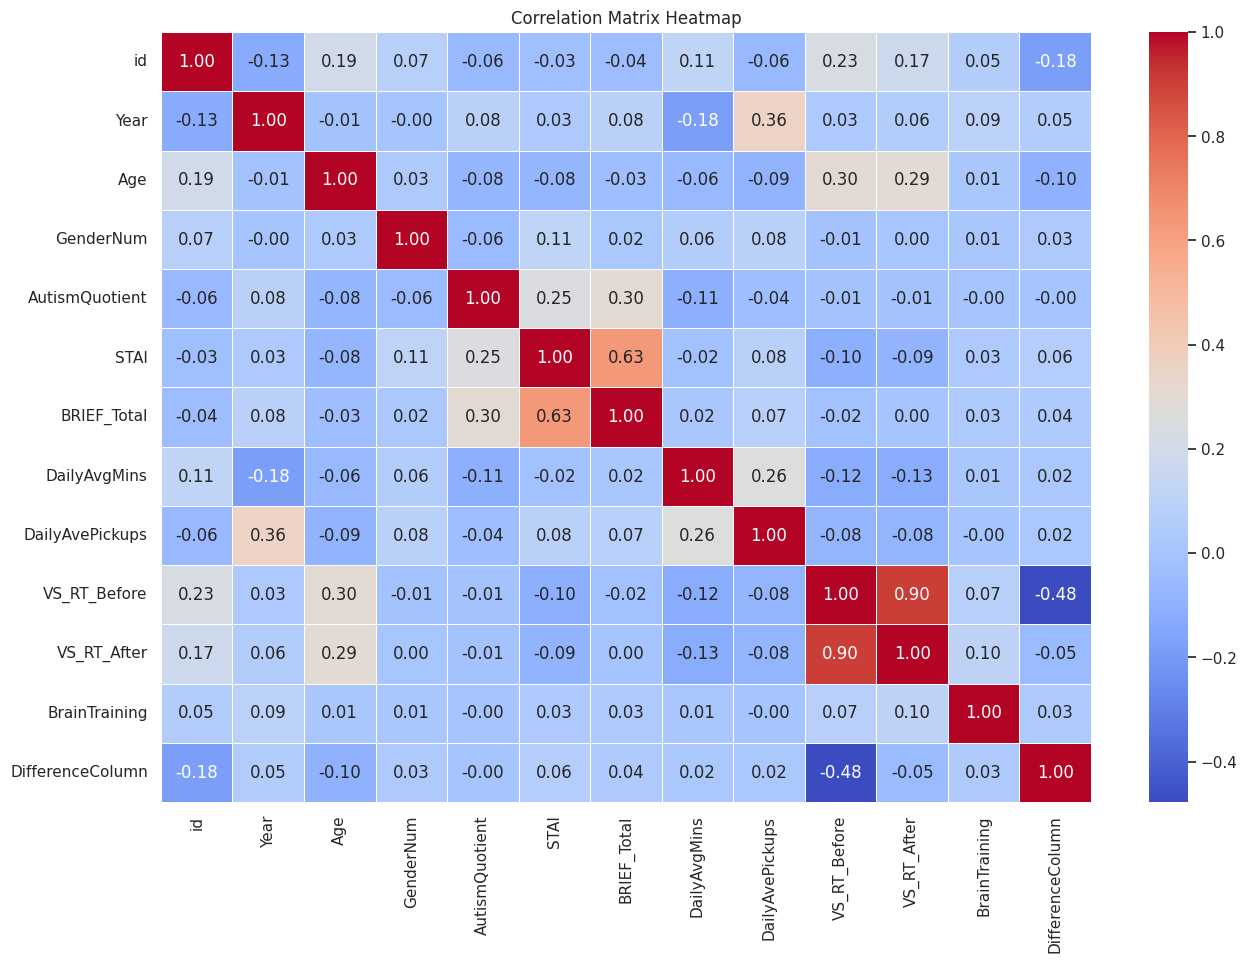

In [ ]:
correlation_matrix = data4.corr()
print(correlation_matrix)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


From this correlation we can see that the data has no linear relationships and therefore dataset 4 is non-linear

## **Exploratory Analysis tehcnique for dataset 4:**

In [ ]:
# Descriptive Statistics
descriptive_stats = data4.describe()
print(descriptive_stats)


               id         Year         Age   GenderNum  AutismQuotient  \
count  543.000000   543.000000  543.000000  543.000000      543.000000   
mean   273.233886  2020.710866   29.650092    1.788214        3.237569   
std    158.569780     0.730978    8.859660    0.435179        1.744974   
min      0.000000  2020.000000   16.000000    1.000000        0.000000   
25%    136.500000  2020.000000   24.000000    2.000000        2.000000   
50%    272.000000  2021.000000   28.000000    2.000000        3.000000   
75%    410.500000  2021.000000   34.000000    2.000000        4.000000   
max    547.000000  2022.000000  101.000000    3.000000       10.000000   

             STAI  BRIEF_Total  DailyAvgMins  DailyAvePickups  VS_RT_Before  \
count  543.000000   543.000000    543.000000       543.000000    543.000000   
mean    47.001842    50.504604    179.662983        49.403315    942.279244   
std     11.975605    25.418771    173.097574        37.105282    195.403623   
min     20.000000

from the descriptive statistics we can see that there are no missing data in our dataset and that there is a mix of numerical and categorical data.

## **Inferential analysis for Dataset 4:**

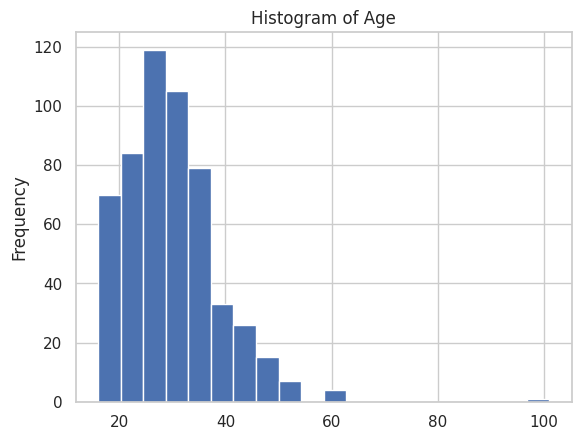

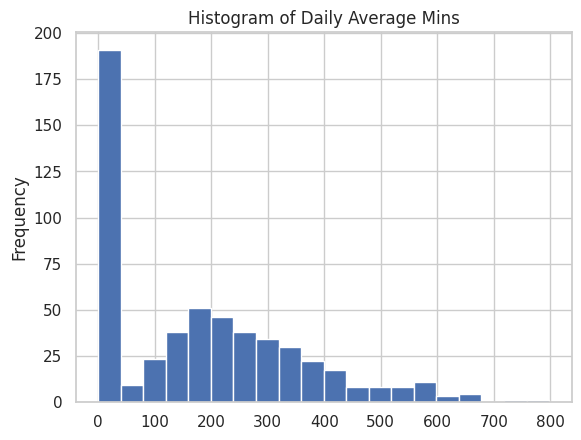

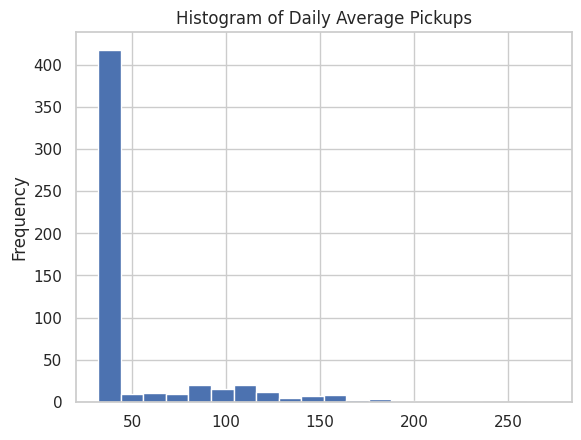

In [ ]:
data4['Age'].plot(kind='hist', bins=20, title='Histogram of Age')
plt.show()

data4['DailyAvgMins'].plot(kind='hist', bins=20, title='Histogram of Daily Average Mins')
plt.show()

data4['DailyAvePickups'].plot(kind='hist', bins=20, title='Histogram of Daily Average Pickups')
plt.show()


## **Predictive Analysis tehcnique for dataset 4:**

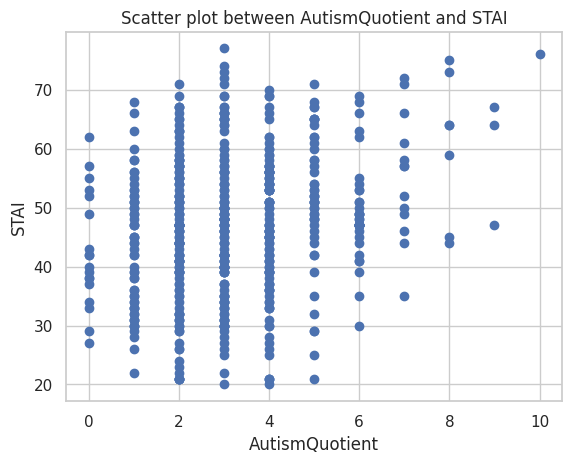

R-squared value of the model: 0.017920330611654323


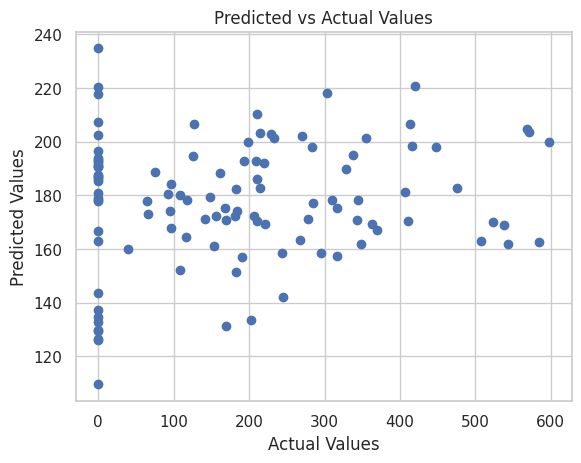

In [ ]:
plt.scatter(data4['AutismQuotient'], data4['STAI'])
plt.title('Scatter plot between AutismQuotient and STAI')
plt.xlabel('AutismQuotient')
plt.ylabel('STAI')
plt.show()

# Predictive Analysis: Linear Regression
# Let's predict DailyAvgMins based on Age, AutismQuotient, STAI, and BRIEF_Total
X = data4[['Age', 'AutismQuotient', 'STAI', 'BRIEF_Total']]
y = data4['DailyAvgMins']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
model_score = model.score(X_test, y_test)
print(f'R-squared value of the model: {model_score}')

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# **Loss Functions:**

What ae loss functions? Loss functions are used to evaluate how well any machine learning algorithms that you have you are at predicitng your models in your dataset. Loss functions are otherwise known as cost or objective functions. Loss functions specifically measure the the difference between the predicited values of the model data and the actual values of the dataset. Loss functions need to be minimised to improve the perfromance of any machine learning.

When to use loss functions? Loss functions are typically used in datasets when you have labelled examples. Specifically, in supervised learning you have input data features correspeonding to a specific target label.

### **DATASET 1:**

For dataseta 1 the appropriate loss functions to apply would be the L1 and L2 loss functions

In [ ]:
# DATASET 1 L1 Loss function

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = data1[['area']]
Y = data1['price']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate L1 loss (Mean Absolute Error) and L2 loss (Mean Squared Error)
l1_loss = mean_absolute_error(Y_test, predictions)
l2_loss = mean_squared_error(Y_test, predictions)

print("L1 Loss (Mean Absolute Error):", l1_loss)
print("L2 Loss (Mean Squared Error):", l2_loss)



L1 Loss (Mean Absolute Error): 1474748.1337969352
L2 Loss (Mean Squared Error): 3675286604768.185


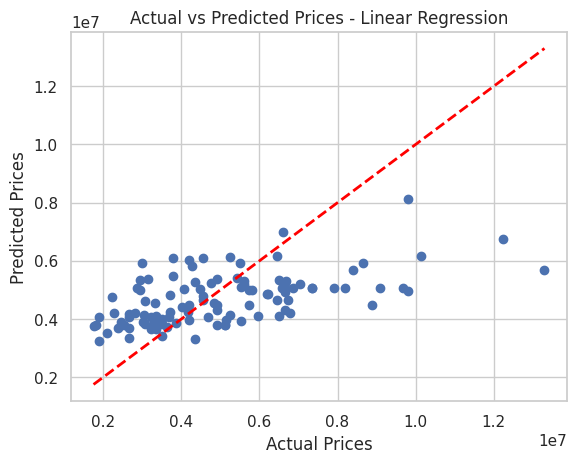

In [ ]:
# Scatter plot to compare actual vs predicted prices
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices - Linear Regression')

# Adding a line for perfect predictions
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

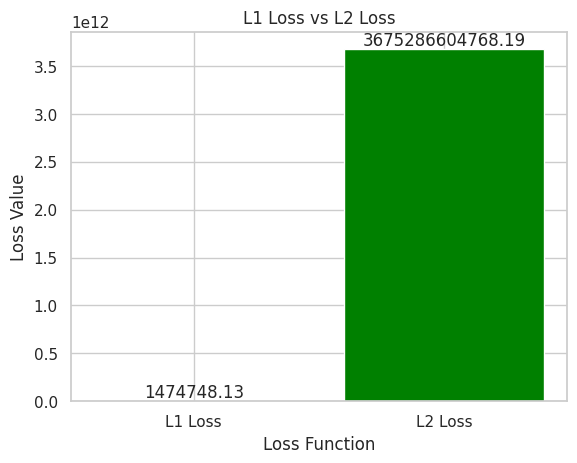

In [ ]:
# Create a bar graph
labels = ['L1 Loss', 'L2 Loss']
loss_values = [l1_loss, l2_loss]

plt.bar(labels, loss_values, color=['blue', 'green'])
plt.title('L1 Loss vs L2 Loss')
plt.xlabel('Loss Function')
plt.ylabel('Loss Value')

# Display the values on top of the bars
for i, value in enumerate(loss_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

For dataset 2 the appropriate loss functions to apply would be the categorical cross-entropy loss function as this loss funciton is suitable for datasets where there is mulit-class classification problems

### **DATASET 2:**

In [ ]:
data2

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster,pca1,pca2
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2,-3.754629,-2.290845
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2,-2.888809,-0.242998
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2,-2.984431,-1.671684
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2,-4.000216,-3.781463
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,-1.534525,-1.212049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1,4.491196,-2.225298
174,174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1,3.710949,-1.837238
175,175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1,3.915253,-2.932134
176,176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1,3.574227,-2.466878


In [ ]:
# DATASET 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Extract features (X) and labels (Y)
X = data2[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols',
        'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue',
        'od280/od315_of_diluted_wines', 'proline', 'pca1', 'pca2']]
Y = data2['cluster']  # Assuming 'cluster' is the column containing class labels

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
logistic_model.fit(X_train, Y_train)

# Make predictions on the test set
probabilities = logistic_model.predict_proba(X_test)

# Compute cross-entropy loss
cross_entropy_loss = log_loss(Y_test, probabilities)
print("Cross-Entropy Loss:", cross_entropy_loss)

# Extract features (X) and labels (Y)
X = data2[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols',
        'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue',
        'od280/od315_of_diluted_wines', 'proline', 'pca1', 'pca2']]
Y = (data2['cluster'] == 2).astype(int)  # Binary classification, assuming '2' is the positive class

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the logistic regression model for binary classification
logistic_model_binary = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
logistic_model_binary.fit(X_train, Y_train)

# Make predictions on the test set
probabilities_binary = logistic_model_binary.predict_proba(X_test)[:, 1]

# Compute binary log loss
binary_log_loss = log_loss(Y_test, probabilities_binary)
print("Binary Log Loss:", binary_log_loss)


Cross-Entropy Loss: 0.05554388665010171
Binary Log Loss: 0.0032152494832368974


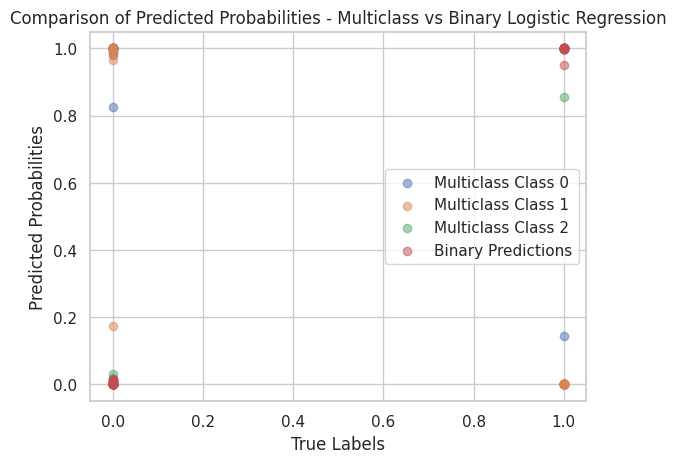

In [ ]:
# Scatter plot for multiclass logistic regression
plt.scatter(Y_test, probabilities[:, 0], label='Multiclass Class 0', alpha=0.5)
plt.scatter(Y_test, probabilities[:, 1], label='Multiclass Class 1', alpha=0.5)
plt.scatter(Y_test, probabilities[:, 2], label='Multiclass Class 2', alpha=0.5)

# Scatter plot for binary logistic regression
plt.scatter(Y_test, probabilities_binary, label='Binary Predictions', alpha=0.5)

plt.xlabel('True Labels')
plt.ylabel('Predicted Probabilities')
plt.title('Comparison of Predicted Probabilities - Multiclass vs Binary Logistic Regression')
plt.legend()
plt.show()

### **DATASET 3:**

In [ ]:
# DATASET 3

from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
X = data3.drop(['label', 'filename'], axis=1)
Y = data3['label']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logistic_model = LogisticRegression(max_iter=100000)
logistic_model.fit(X_train, Y_train)  # Fit the model without label encoding

# Make predictions on the test set
probabilities = logistic_model.predict_proba(X_test)

# Calculate logistic log loss
log_loss_value = log_loss(Y_test, probabilities)

print("Logistic Log Loss:", log_loss_value)


Logistic Log Loss: 1.373713992253088


In [ ]:
# DATASET 4

# Extracting features (X) and target variable (Y)
X = data4.drop('DailyAvePickups', axis=1)
Y = data4['DailyAvePickups']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate L1 Loss (Mean Absolute Error) and L2 Loss (Mean Squared Error)
l1_loss = mean_absolute_error(Y_test, predictions)
l2_loss = mean_squared_error(Y_test, predictions)

print("L1 Loss (Mean Absolute Error):", l1_loss)
print("L2 Loss (Mean Squared Error):", l2_loss)

L1 Loss (Mean Absolute Error): 21.052441722830693
L2 Loss (Mean Squared Error): 653.323239862189


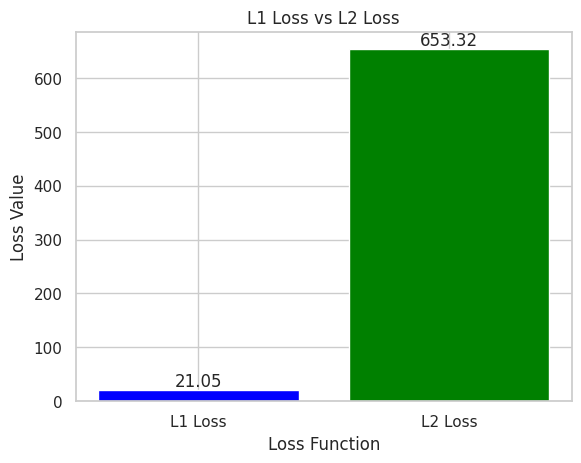

In [ ]:
# Create a bar graph
labels = ['L1 Loss', 'L2 Loss']
loss_values = [l1_loss, l2_loss]

plt.bar(labels, loss_values, color=['blue', 'green'])
plt.title('L1 Loss vs L2 Loss')
plt.xlabel('Loss Function')
plt.ylabel('Loss Value')

# Display the values on top of the bars
for i, value in enumerate(loss_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [ ]:

# Extracting features (X) and target variable (Y)
X = data4.drop('AutismQuotient', axis=1)
Y = data4['AutismQuotient']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Encode the labels to numerical values (for logistic regression)
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, Y_train)

# Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict_proba(X_test)
svm_predictions = svm_model.decision_function(X_test)

# Explicitly specify labels for hinge_loss
labels = label_encoder.classes_
hinge_loss_value = hinge_loss(Y_test, svm_predictions, labels=labels)
binary_cross_entropy_loss = log_loss(Y_test, logistic_predictions, labels=labels)

print("Hinge Loss:", hinge_loss_value)
print("Binary Cross-Entropy Loss:", binary_cross_entropy_loss)


Hinge Loss: 2.6794763331661864
Binary Cross-Entropy Loss: 1.8545227826057837


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


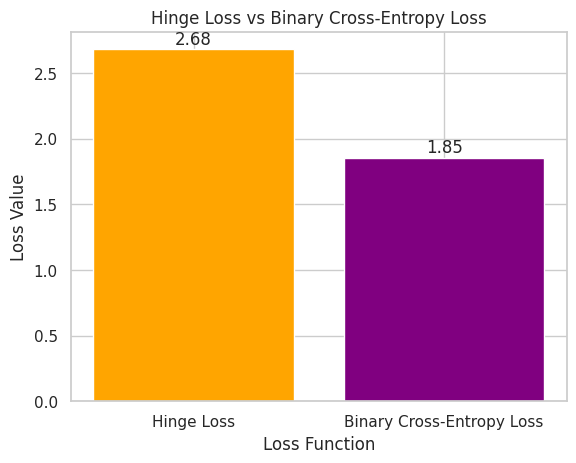

In [ ]:
# Create a bar graph
labels = ['Hinge Loss', 'Binary Cross-Entropy Loss']
loss_values = [hinge_loss_value, binary_cross_entropy_loss]

plt.bar(labels, loss_values, color=['orange', 'purple'])
plt.title('Hinge Loss vs Binary Cross-Entropy Loss')
plt.xlabel('Loss Function')
plt.ylabel('Loss Value')

# Display the values on top of the bars
for i, value in enumerate(loss_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

**5. Kernal Transformation**

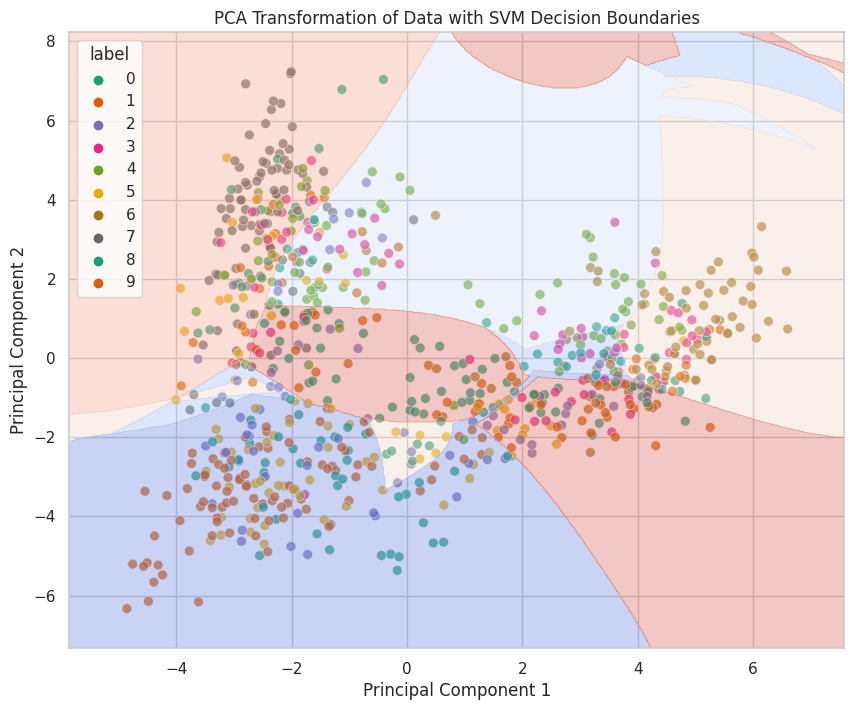

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = data3.drop('filename', axis =1)

# Separate features (X) and target variable (y)
X = df.drop(columns=['label'])
y = df['label']

# Convert label to numerical values
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y = y.map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Fit SVM model on the reduced data
svm = SVC(kernel='rbf')
svm.fit(X_train_pca, y_train)

# Transform test data using the same PCA
X_test_pca = pca.transform(X_test_scaled)

# Predict on the test set
y_pred = svm.predict(X_test_pca)

# Visualize the transformation
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='Dark2', s=50, alpha=0.7)
plt.title('PCA Transformation of Data with SVM Decision Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.show()

**6. Overfitting**

Create an scenario for overfitting in the context of regression.

What dataset would be suitable for this task? For this question I choose the wine data set because there is lots of different features of the wines.

In order to demonstrate overfitting I have decided to reduce the subset of the data used in the test. Having a smaller subset increases overfitting as instead of learning the patterns of the data the model may instead remember specific values leading to poor generalisation of the data. Furthermore because our data has many features it is a somewhat complex model and therefore if the model is used on a small dataset the model can capture noise and scecifities in the data leading to poor perfromance.

I have also chosen the target variable for my regression to be the alcohol level and both models will have the same independent variables.

In [ ]:
# Begin by downloading the libraries needed for this task (may have already been downloaded previously in file but good to do this step anyway)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a smaller subset of the original wine dataset
small_subset = data2.sample(20, random_state=42)

# Split the small subset into training and testing sets
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(small_subset[['magnesium', 'malic_acid','proline']], small_subset['alcohol'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data2[['magnesium', 'malic_acid', 'proline']], data2['alcohol'], test_size=0.2, random_state=42)

# Train a linear regression model
model_small = LinearRegression()
model_small.fit(X_train_small, y_train_small)

model_original = LinearRegression()
model_original.fit(X_train, y_train)


# Evaluate the model on the test set
test_score_small = model_small.score(X_test_small, y_test_small)
print(f"Test R^2 score with a small dataset: {test_score_small}")
test_score = model_original.score(X_test, y_test)
print(f"Test R^2 score with the entire dataset: {test_score}")


Test R^2 score with a small dataset: 0.9529715567853304
Test R^2 score with the entire dataset: 0.6170632647765271


This has demonstrated overfitting as the R-squared vlaue for the smaller dataset is larger (0.9529715567853304) than in the normal dataset (0.6170632647765271)

Metrics:
MSE: 0.22862694100905717
R^2 Score: 0.6170632647765271


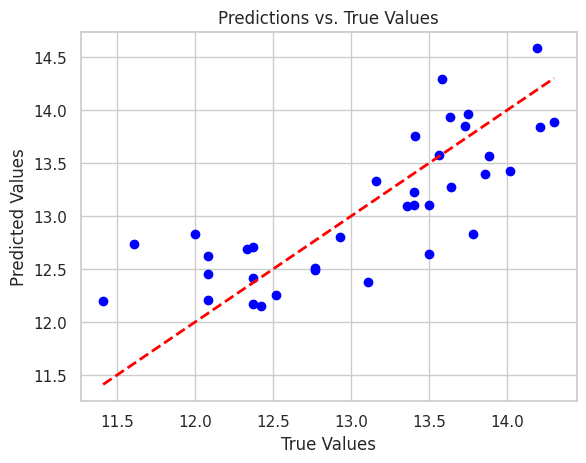

Metrics:
MSE: 0.03409415169178503
R^2 Score: 0.9529715567853304


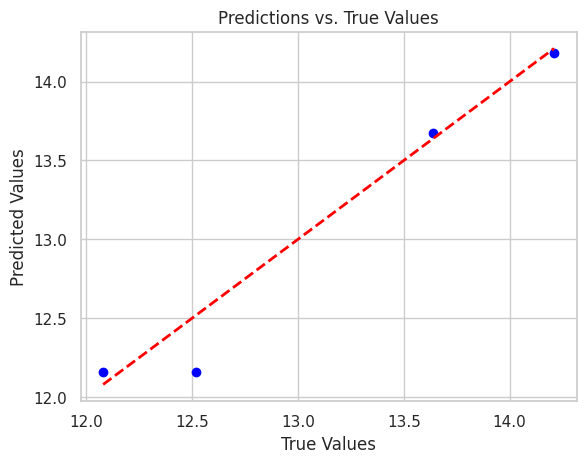

In [ ]:
# Define evaluate_and_plot function
def evaluate_and_plot(model, X_train, X_test, y_train, y_test):
    # Predictions for the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print("Metrics:")
    print(f"MSE: {mse}")
    print(f"R^2 Score: {r2}")

    # Scatter plot
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.title('Predictions vs. True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

evaluate_and_plot(model_original, X_train, X_test, y_train, y_test)
evaluate_and_plot(model_small, X_train_small, X_test_small, y_train_small, y_test_small)

In [ ]:
train_score_small = model_small.score(X_train_small, y_train_small)
print(f"Train R^2 score with a small dataset: {train_score_small}")

train_score_original = model_original.score(X_train, y_train)
print(f"Train R^2 score with the entire dataset: {train_score_original}")


Train R^2 score with a small dataset: 0.7004703854661465
Train R^2 score with the entire dataset: 0.4251562982469337


**Applying two regularisation methods**

For this example I have chosen to apply both lasso and ridge regression to both models. Lasso and Ridge regression are two types of common regularisation techniques used in linear regression to prevent overfitting. More specifically:

Rridge regression adds a regularization term to the linear regression objective function that is proportional to the square of the magnitude of the coefficients.

Lasso regression adds a regularization term to the linear regression objective function that is proportional to the absolute value of the coefficients.

Below i have applied both ridge and lasso regression to both of my models and plotted the outcomes for an easy comparison.

Metrics for Lasso (Small):
MSE: 0.03483053618508979
R^2 Score: 0.9519558102537664


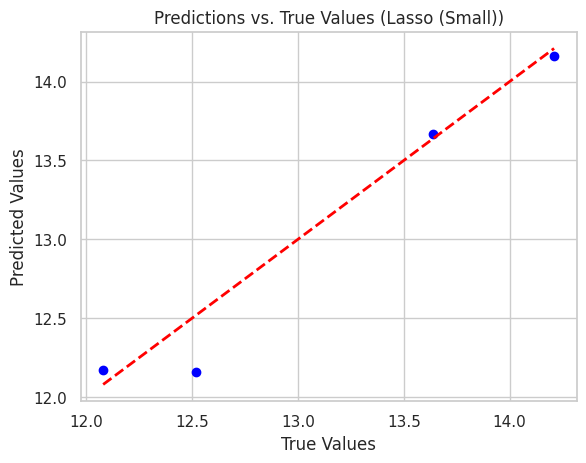

Metrics for Ridge (Small):
MSE: 0.03410249130007912
R^2 Score: 0.9529600533815021


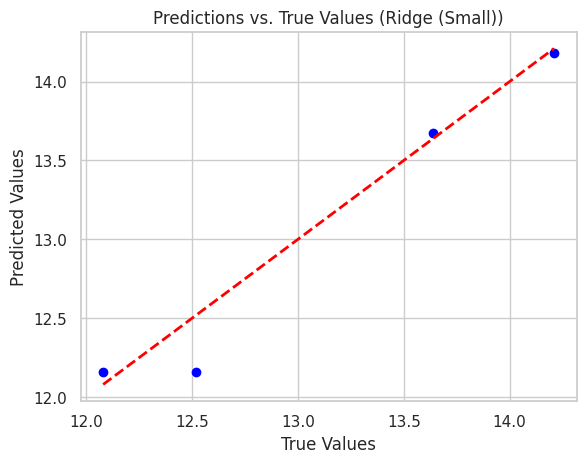

Metrics for Lasso (Entire):
MSE: 0.23027551947594033
R^2 Score: 0.6143019924038065


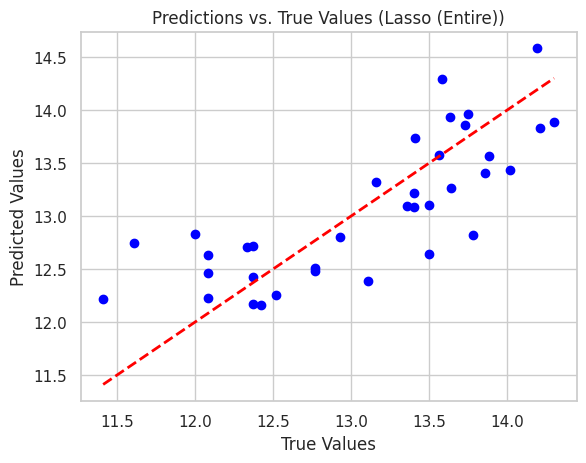

Metrics for Ridge (Entire):
MSE: 0.2286287548998312
R^2 Score: 0.6170602266157226


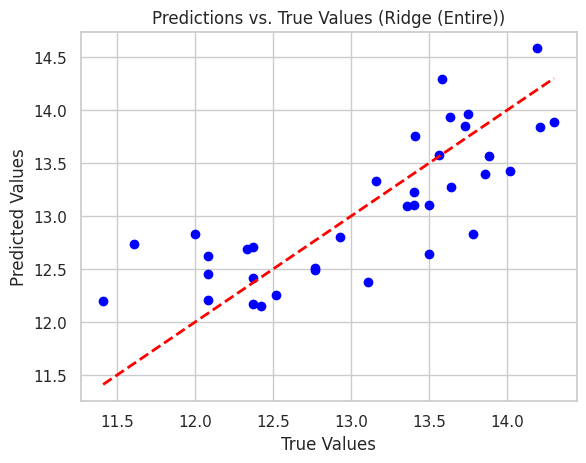

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Function to evaluate and plot the model
def evaluate_and_plot(model, X_train, X_test, y_train, y_test, title):
    # Predictions for the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Metrics for {title}:")
    print(f"MSE: {mse}")
    print(f"R^2 Score: {r2}")

    # Scatter plot
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.title(f'Predictions vs. True Values ({title})')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Train Lasso and Ridge models on the small dataset
lasso_model_small = Lasso(alpha=0.01)  # You can adjust the alpha parameter
ridge_model_small = Ridge(alpha=0.01)  # You can adjust the alpha parameter

lasso_model_small.fit(X_train_small, y_train_small)
ridge_model_small.fit(X_train_small, y_train_small)

# Evaluate and plot the models on the small dataset
evaluate_and_plot(lasso_model_small, X_train_small, X_test_small, y_train_small, y_test_small, 'Lasso (Small)')
evaluate_and_plot(ridge_model_small, X_train_small, X_test_small, y_train_small, y_test_small, 'Ridge (Small)')

# Train Lasso and Ridge models on the entire dataset
lasso_model_original = Lasso(alpha=0.01)  # You can adjust the alpha parameter
ridge_model_original = Ridge(alpha=0.01)  # You can adjust the alpha parameter

lasso_model_original.fit(X_train, y_train)
ridge_model_original.fit(X_train, y_train)

# Evaluate and plot the models on the entire dataset
evaluate_and_plot(lasso_model_original, X_train, X_test, y_train, y_test, 'Lasso (Entire)')
evaluate_and_plot(ridge_model_original, X_train, X_test, y_train, y_test, 'Ridge (Entire)')


**7. Overfitting for classification**





Overfitting in classification using a smaller sample can lead to incorrect results because the model becomes too tailored to the noise or outliers in the data. If the model captures this then it will fail when generalising for new an dunseen data.

A small dataset may not adequately represent the diversity and variability present in the entire population, leading to overfitting.

In [ ]:
# Import libraries that we need even if they have been installed before (just to check)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset and drop the filename column as this is not a variable that we are going to use

df = data3.drop('filename', axis=1)

# Check the distribution of classes to make sure that they are evenly distributed
class_distribution = df['label'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Create a smaller subset of the original dataset
small_subset = df.sample(50, random_state=42)

# Split the dataset into features (X) and music labels (y)
X = df.drop('label', axis=1)
y = df['label']
X_small = small_subset.drop('label', axis=1)
y_small = small_subset['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
model_small = DecisionTreeClassifier(random_state=42)
model_small.fit(X_train_small, y_train_small)

# Make Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions_small = model_small.predict(X_train_small)
test_predictions_small = model_small.predict(X_test_small)

# Evaluate performance on training set
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")
train_accuracy_small = accuracy_score(y_train_small, train_predictions_small)
print(f"Small Training Accuracy: {train_accuracy_small:.2f}")

# Evaluate performance on testing set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.2f}")
test_accuracy_small = accuracy_score(y_test_small, test_predictions_small)
print(f"Small Testing Accuracy: {test_accuracy_small:.2f}")

# Compare classification reports for both models
print("Real Model Classification Report:")
print(classification_report(y_test, test_predictions))

print("\nOverfitting Model Classification Report:")
print(classification_report(y_test_small, test_predictions_small))


Class Distribution:
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64
Training Accuracy: 1.00
Small Training Accuracy: 1.00
Testing Accuracy: 0.42
Small Testing Accuracy: 0.20
Real Model Classification Report:
              precision    recall  f1-score   support

       blues       0.29      0.25      0.27        20
   classical       0.77      0.77      0.77        13
     country       0.29      0.26      0.27        27
       disco       0.24      0.29      0.26        21
      hiphop       0.39      0.47      0.42        15
        jazz       0.37      0.45      0.41        22
       metal       0.73      0.76      0.75        25
         pop       0.47      0.69      0.56        13
      reggae       0.47      0.30      0.37        23
        rock       0.25      0.19      0.22        21

    accuracy                           0.42     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Create a confusion matrix for the testing set
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_distribution.index, yticklabels=class_distribution.index)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a confusion matrix for the small testing set
conf_matrix_small = confusion_matrix(y_test_small, test_predictions_small)

# Plot the confusion matrix for the small testing set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_small, annot=True, fmt='d', cmap='Blues', xticklabels=class_distribution.index, yticklabels=class_distribution.index)
plt.title('Confusion Matrix (Small Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features as regularization methods are sensitive to the scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_small_scaled = scaler.transform(X_train_small)
X_test_small_scaled = scaler.transform(X_test_small)

# Apply L1 regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model_l1.fit(X_train_scaled, y_train)
model_l1_small = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model_l1_small.fit(X_train_small_scaled, y_train_small)

# Apply L2 regularization (Ridge)
model_l2 = LogisticRegression(penalty='l2', random_state=42)
model_l2.fit(X_train_scaled, y_train)
model_l2_small = LogisticRegression(penalty='l2', random_state=42)
model_l2_small.fit(X_train_small_scaled, y_train_small)

# Evaluate performance before regularization
print("Performance before Regularization:")
print("Real Model:")
print(classification_report(y_test, test_predictions))
print("Overfitting Model:")
print(classification_report(y_test_small, test_predictions_small))

# Evaluate performance after L1 regularization
test_predictions_l1 = model_l1.predict(X_test_scaled)
test_predictions_l1_small = model_l1_small.predict(X_test_small_scaled)
print("\nPerformance after L1 Regularization:")
print("Real Model:")
print(classification_report(y_test, test_predictions_l1))
print("Overfitting Model:")
print(classification_report(y_test_small, test_predictions_l1_small))

# Evaluate performance after L2 regularization
test_predictions_l2 = model_l2.predict(X_test_scaled)
test_predictions_l2_small = model_l2_small.predict(X_test_small_scaled)
print("\nPerformance after L2 Regularization:")
print("Real Model:")
print(classification_report(y_test, test_predictions_l2))
print("Overfitting Model:")
print(classification_report(y_test_small, test_predictions_l2_small))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

Performance before Regularization:
Real Model:
              precision    recall  f1-score   support

       blues       0.29      0.25      0.27        20
   classical       0.77      0.77      0.77        13
     country       0.29      0.26      0.27        27
       disco       0.24      0.29      0.26        21
      hiphop       0.39      0.47      0.42        15
        jazz       0.37      0.45      0.41        22
       metal       0.73      0.76      0.75        25
         pop       0.47      0.69      0.56        13
      reggae       0.47      0.30      0.37        23
        rock       0.25      0.19      0.22        21

    accuracy                           0.42       200
   macro avg       0.43      0.44      0.43       200
weighted avg       0.42      0.42      0.41       200

Overfitting Model:
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00         1
   classical       1.00      1.00      1.00         1
     country

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**9. Decision Trees**

Perform the below task on MASTER_PhonesmartdataAll_CCI_AdvStats.csv and
wine dataset

In [ ]:
data3

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

X = data3.drop(['filename', 'label'], axis=1)
y = data3['label']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.42

Classification Report:
               precision    recall  f1-score   support

       blues       0.29      0.25      0.27        20
   classical       0.77      0.77      0.77        13
     country       0.29      0.26      0.27        27
       disco       0.24      0.29      0.26        21
      hiphop       0.39      0.47      0.42        15
        jazz       0.37      0.45      0.41        22
       metal       0.73      0.76      0.75        25
         pop       0.47      0.69      0.56        13
      reggae       0.47      0.30      0.37        23
        rock       0.25      0.19      0.22        21

    accuracy                           0.42       200
   macro avg       0.43      0.44      0.43       200
weighted avg       0.42      0.42      0.41       200



In [ ]:
data4

,id,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After,AgeGroup,DailyAvgGroup,BrainTraining,DifferenceColumn
0,190,2021,16,1.0,2,24,12,iphone,0,32,1840.291667,1896.975000,a,a,1,56.683333
1,488,2020,33,1.0,3,42,49,iphone,0,32,2125.150000,1849.425000,b,a,1,-275.725000
2,494,2020,59,1.0,4,51,65,iphone,0,32,1851.734083,1659.979306,c,a,1,-191.754777
3,7,2021,31,2.0,1,43,44,iPhone,259,54,1015.666667,1524.733333,b,a,1,509.066666
4,171,2021,43,2.0,0,52,43,iPhone,119,57,1625.691667,1504.225000,b,a,0,-121.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,418,2020,27,2.0,4,30,34,Android,141,32,720.875417,628.811944,a,a,1,-92.063472
539,423,2020,18,2.0,3,47,63,iPhone,598,32,660.135833,625.043750,a,b,0,-35.092083
540,9,2021,27,1.0,3,32,4,iPhone,155,97,650.187500,604.390000,a,a,1,-45.797500
541,242,2020,30,2.0,3,54,27,iPhone,94,32,625.630917,604.172889,a,a,0,-21.458028


In [182]:
X = data4.drop(['id', 'BrainTraining','Device','AgeGroup','DailyAvgGroup'], axis=1)
y = data4['BrainTraining']

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Convert class labels to strings
class_labels_str = label_encoder.classes_.astype(str)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=class_labels_str)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_str)


Accuracy: 0.6330275229357798

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.62        54
           1       0.63      0.67      0.65        55

    accuracy                           0.63       109
   macro avg       0.63      0.63      0.63       109
weighted avg       0.63      0.63      0.63       109

